In [1]:
from vega_datasets import data
import pandas as pd
import matplotlib.pyplot as plt

## Call the sf_temps() dataset from the vega_datasets library like so:


In [2]:
df = data.sf_temps()

In [3]:
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


## data.sf_temps()
 

## Use the above dataset for the following exercises:


### Resample by the day and take the average temperature. Visualize the average temperature over time.


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [5]:
average_temp_by_day = df.resample('D').mean()

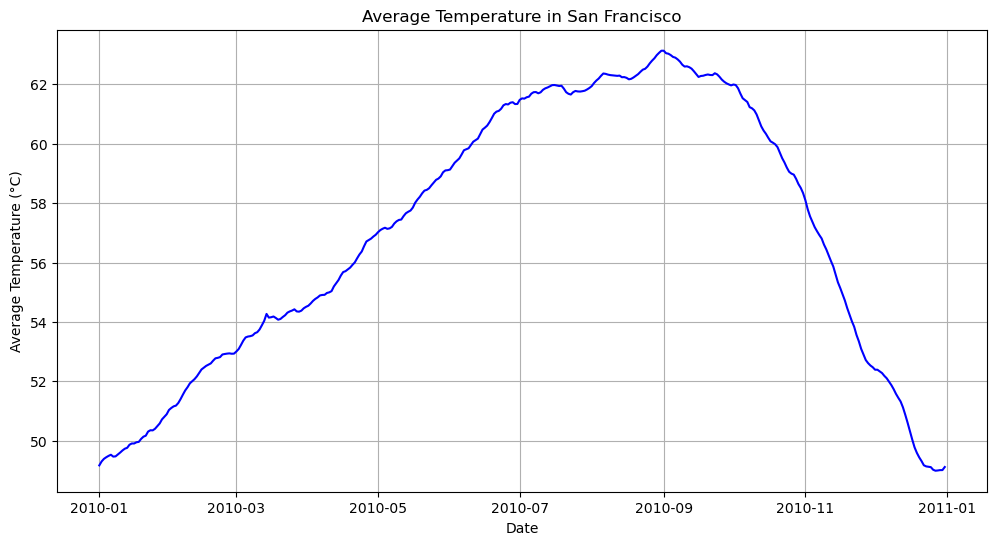

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(average_temp_by_day.index, average_temp_by_day['temp'], color='blue')
plt.title('Average Temperature in San Francisco')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

### Write the code necessary to visualize the minimum temperature over time.


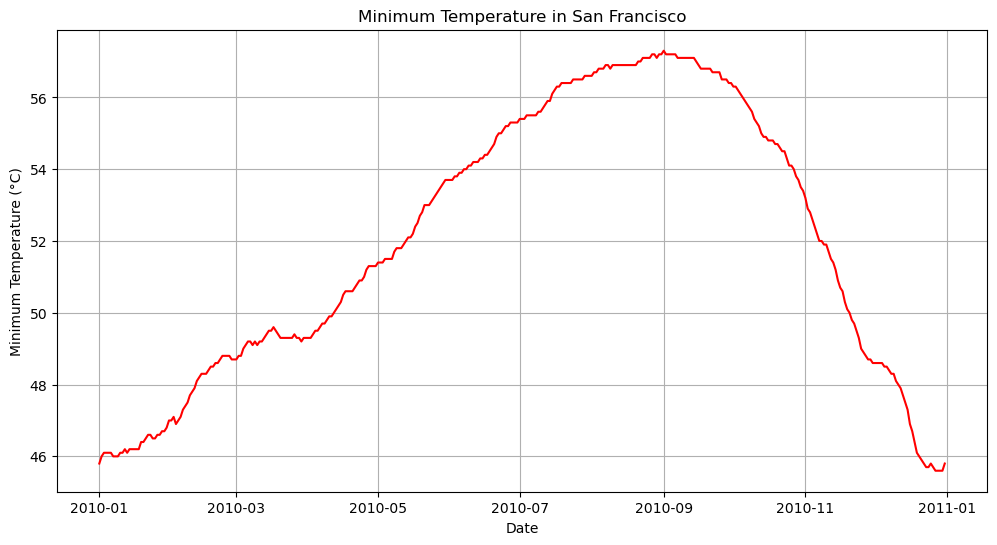

In [7]:
min_temp_by_day = df.resample('D').min()

plt.figure(figsize=(12, 6))
plt.plot(min_temp_by_day.index, min_temp_by_day['temp'], color='red')
plt.title('Minimum Temperature in San Francisco')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

### Write the code necessary to visualize the maximum temperature over time.

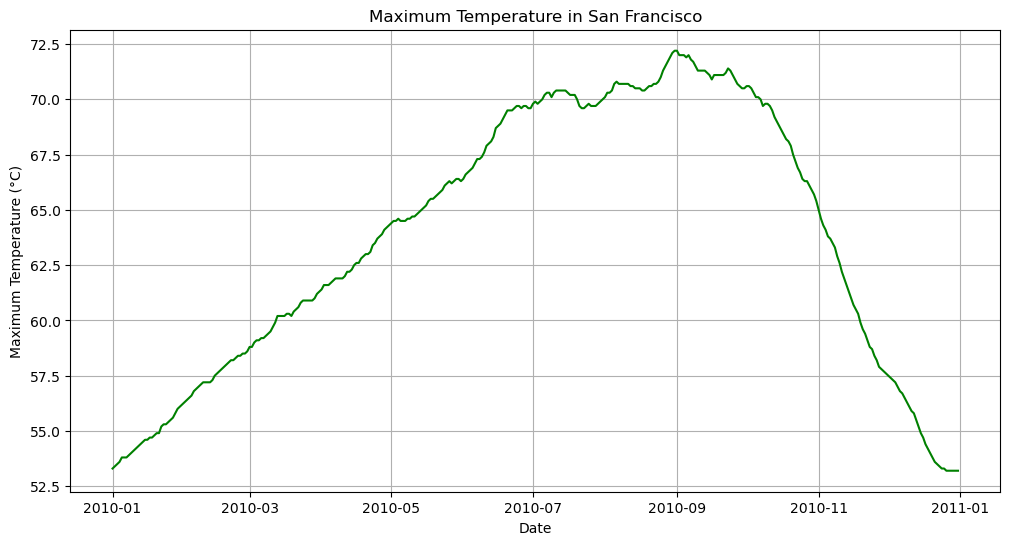

In [8]:
max_temp_by_day = df.resample('D').max()

plt.figure(figsize=(12, 6))
plt.plot(max_temp_by_day.index, max_temp_by_day['temp'], color='green')
plt.title('Maximum Temperature in San Francisco')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True)
plt.show()

### Which month is the coldest, on average?

In [9]:
df['month'] = df.index.month

average_temp_by_month = df.groupby('month')['temp'].mean()

coldest_month = average_temp_by_month.idxmin()


In [10]:
coldest_month

1

### Which month has the highest average temperature?

In [11]:
df['month'] = df.index.month

average_temp_by_month = df.groupby('month')['temp'].mean()

warmest_month = average_temp_by_month.idxmax()

In [12]:
warmest_month

9

### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
temp_min_max_by_day = df.resample('D').agg({'temp': ['min', 'max']})
temp_min_max_by_day['temp_change'] = temp_min_max_by_day['temp']['max'] - temp_min_max_by_day['temp']['min']

In [14]:
month_with_highest_variability = temp_min_max_by_day['temp_change'].idxmax().month

In [15]:
temp_min_max_by_day

temp       temp_change
             min   max            
date                              
2010-01-01  45.8  53.3         7.5
2010-01-02  46.0  53.4         7.4
2010-01-03  46.1  53.5         7.4
2010-01-04  46.1  53.6         7.5
2010-01-05  46.1  53.8         7.7
...          ...   ...         ...
2010-12-27  45.6  53.2         7.6
2010-12-28  45.6  53.2         7.6
2010-12-29  45.6  53.2         7.6
2010-12-30  45.6  53.2         7.6
2010-12-31  45.8  53.2         7.4

[365 rows x 3 columns]

In [16]:
month_with_highest_variability

8

## data.seattle_weather()

### Use the above dataset for the following exercises: 

In [17]:
df = data.seattle_weather()

In [18]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### Which year and month combination has the highest amount of precipitation?

In [19]:
df.set_index('date', inplace=True)

precipitation_by_year_month = df.resample('M')['precipitation'].sum()

year_month_with_highest_precipitation = precipitation_by_year_month.idxmax()



In [20]:
year_month_with_highest_precipitation

Timestamp('2015-12-31 00:00:00', freq='M')

### Visualize the amount of monthly precipitation over time.

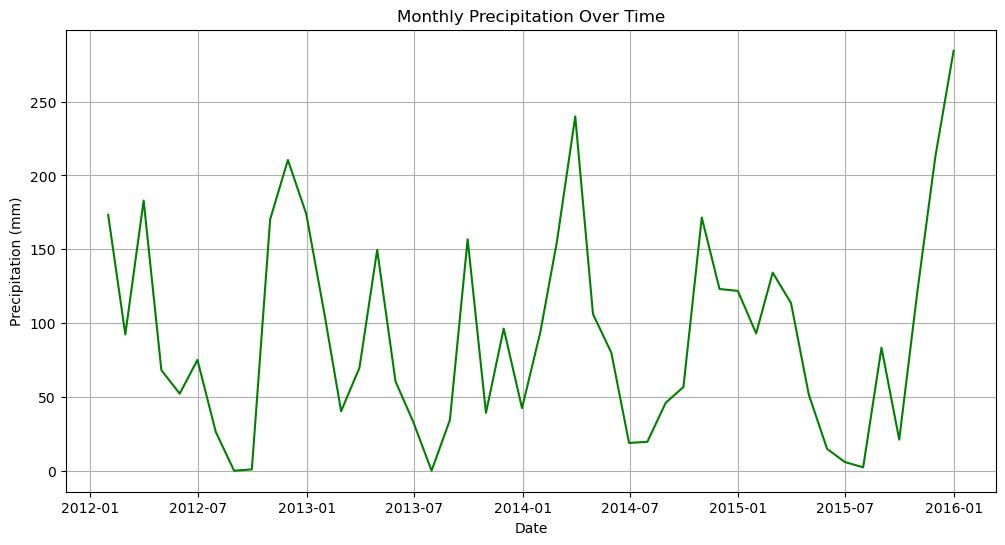

In [21]:
precipitation_by_month = df.resample('M')['precipitation'].sum()

plt.figure(figsize=(12, 6))
plt.plot(precipitation_by_month.index, precipitation_by_month.values, color='green')
plt.title('Monthly Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

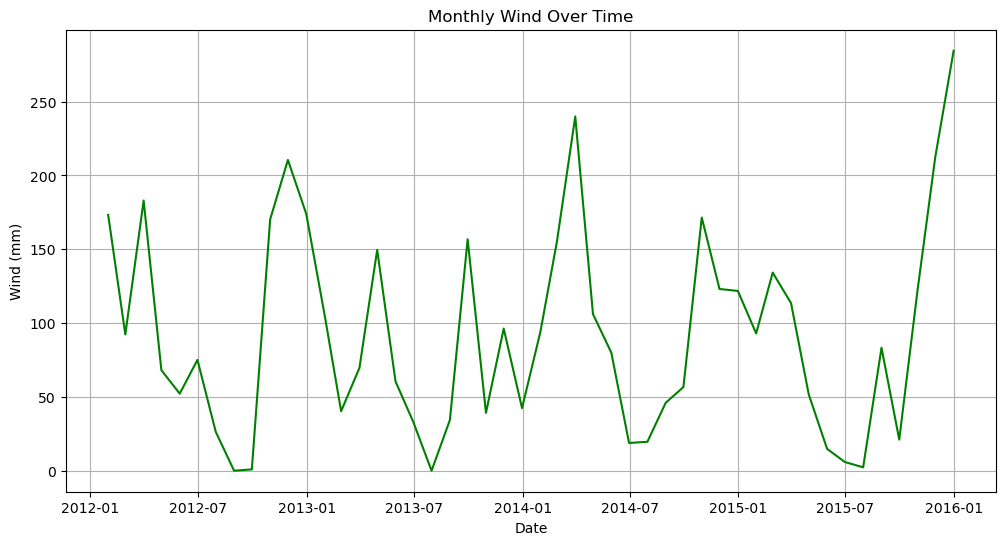

In [22]:
wind_over_month = df.resample('M')['wind'].sum()

plt.figure(figsize=(12, 6))
plt.plot(precipitation_by_month.index, precipitation_by_month.values, color='green')
plt.title('Monthly Wind Over Time')
plt.xlabel('Date')
plt.ylabel('Wind (mm)')
plt.grid(True)
plt.show()

### Which year-month combination is the windiest? 

In [23]:
wind_by_year_month = df.resample('M')['wind'].sum()

year_month_with_highest_wind = wind_by_year_month.idxmax()

In [24]:
year_month_with_highest_wind

Timestamp('2015-12-31 00:00:00', freq='M')

### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [25]:
df['year'] = df.index.year

sunny_days = df[df['weather'] == 'sun']

sunniest_year = sunny_days['year'].value_counts().idxmax()

In [26]:
sunniest_year

2014

### In which month does it rain the most?

In [27]:
df['month'] = df.index.month

rainy_days = df[df['weather'] == 'rain']

rainiest_month = rainy_days.groupby('month')['precipitation'].sum().idxmax()

In [28]:
rainiest_month

1

### Which month has the most number of days with a non-zero amount of precipitation?

In [29]:
df['month'] = df.index.month

non_zero_precipitation_days = df[df['precipitation'] > 0]

precipitation_days_by_month = non_zero_precipitation_days.groupby('month').size()

rainiest_month = precipitation_days_by_month.idxmax()

In [30]:
rainiest_month

12

## data.flights_20k() 

## Use the above dataset for the following exercises:

In [31]:
df = data.flights_20k()

In [32]:
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


### Convert any negative delays to 0.

In [33]:
df['delay'] = df['delay'].apply(lambda x: x if x >= 0 else 0)

In [34]:
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


### Which hour of the day has the highest average delay?

In [35]:
df['date'] = pd.to_datetime(df['date'])

df['hour'] = df['date'].dt.hour

average_delay_by_hour = df.groupby('hour')['delay'].mean()

hour_with_highest_avg_delay = average_delay_by_hour.idxmax()

In [36]:
hour_with_highest_avg_delay

3

### Does the day of the week make a difference in the delay amount?

In [37]:
df['day_of_week'] = df['date'].dt.dayofweek

average_delay_by_day_of_week = df.groupby('day_of_week')['delay'].mean()

In [38]:
average_delay_by_day_of_week

day_of_week
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

### Does the month make a difference in the delay amount?

In [39]:
df['month'] = df['date'].dt.month

average_delay_by_month = df.groupby('month')['delay'].mean()

In [40]:
average_delay_by_month

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64